# *** EDA Sistema de recomendación  OJO: este modelo me entrega un porcentaje de predicción muy bajo 0.3***

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
#import itertools
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import wordnet

#nltk.download('punkt')
#nltk.download('stopwords')


In [2]:
df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")

In [3]:
df.count()

title           42388
vote_average    42388
dtype: int64

In [4]:
df.columns

Index(['title', 'vote_average'], dtype='object')

In [5]:

plReco = df[["title", 'vote_average']][df['title'].str.contains("Robin")]
plReco = plReco.sort_values(by='vote_average', ascending= False)  
plReco.head(5)    

,title,vote_average
26213,The Court-Martial of Jackie Robinson,10
877,The Adventures of Robin Hood,7
24788,Robin Williams: Weapons of Self Destruction,7
949,Swiss Family Robinson,7
40709,Robin Williams: Live on Broadway,7


In [6]:
tex = "robin hood"
tex = tex.title()
tex

'Robin Hood'

In [7]:
def get_recommendation(titulo: str):
    df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")
    plReco = df[["title", 'vote_average']][df['title'].str.contains(f"{titulo.title()}")]
    plReco = plReco.sort_values(by="vote_average", ascending= False)  
    return plReco.head(5)

In [8]:
get_recommendation("robin")

,title,vote_average
26213,The Court-Martial of Jackie Robinson,10
877,The Adventures of Robin Hood,7
24788,Robin Williams: Weapons of Self Destruction,7
949,Swiss Family Robinson,7
40709,Robin Williams: Live on Broadway,7


## ***1- ANÁLISIS DE COLECCIÓN***

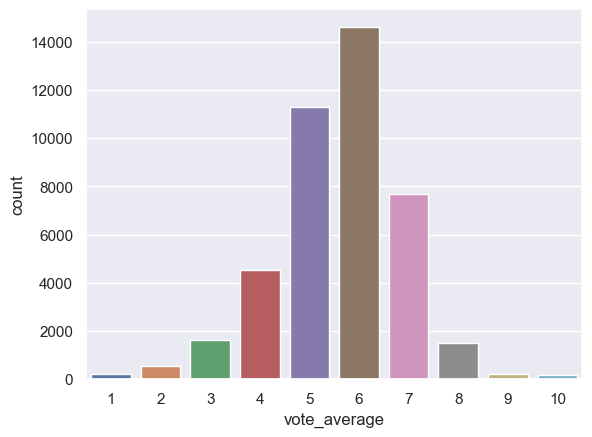

In [9]:
sns.countplot(x= "vote_average", data = df )
plt.show()

***

***

***

In [10]:
df.head()

,title,vote_average
0,Toy Story,7
1,Jumanji,6
2,Grumpier Old Men,6
3,Waiting to Exhale,6
4,Father of the Bride Part II,5


In [11]:
df.shape

(42388, 2)

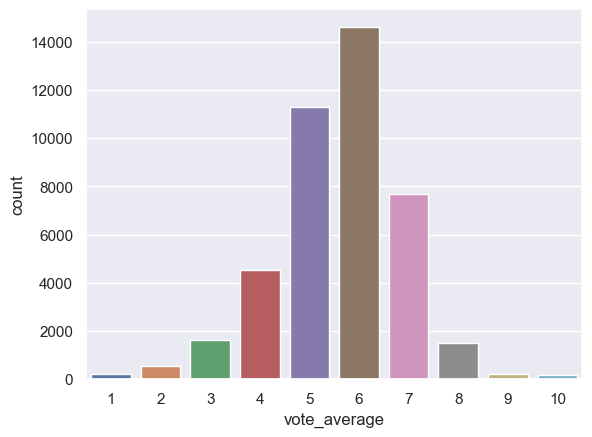

In [12]:
sns.countplot(x= "vote_average", data = df )
plt.show()

## ***2- Exploración de datos***

In [13]:
index_random_titulo_pelicula = np.random.randint(0, high= df.shape[0])
titulo_pelicula = df.iloc[index_random_titulo_pelicula].title
print(index_random_titulo_pelicula, titulo_pelicula)

19777 The Land


In [14]:
print(index_random_titulo_pelicula, df.iloc[index_random_titulo_pelicula].vote_average)

19777 9


## ***3- NLTK***

In [15]:
## Tokenizr por palabras
titulo_wk = nltk.tokenize.word_tokenize(titulo_pelicula)
titulo_wk

['The', 'Land']

In [16]:
## re Exprecion regular 
import re
titular_wt = nltk.tokenize.word_tokenize("El día de ayer fue el día más lluvioso del año!!.".lower())
re.sub("[^a-zA-Z!ñíá]"," ",str(titular_wt))

'  el    día    de    ayer    fue    el    día    más    lluvioso    del    año    !    !       '

### Normalizar

In [17]:
# Diccionario de palabras inutilies en ingles es 'english' en español es 'apanish'
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords
stopwords.append(":") # agregar una palabra inútil
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [802]:
titulo_wk

['Next', 'Year', 'If', 'All', 'Goes', 'Well']

In [18]:
# Eliminar palabras inútiles
titulo_wk_sin_sw = [word for word in titulo_wk if word not in stopwords]
titulo_wk_sin_sw

['The', 'Land']

In [19]:
titulo_wk = nltk.tokenize.word_tokenize(titulo_pelicula)
titulo_wk

['The', 'Land']

***

***

***

### Convertimos los títulos en listas de palabras Mayores de 7

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords
stopwords.append("-")
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

# mascara
df_vote_average_mayores_7 = df[df.vote_average >= 7]
df_vote_average_mayores_7.head()

todos_titulos_vote_average_mayores_7 = []
for i in range(df_vote_average_mayores_7.shape[0]):
    titulo = df_vote_average_mayores_7.iloc[i].title
    titulo = re.sub("[^a-zA-Z!ñíá]"," ",str(titulo)).lower()
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    titulo = [word for word in titulo if word not in stopwords]
    titulo = [word for word in titulo if word not in filtrar]

    todos_titulos_vote_average_mayores_7.append(titulo)

todos_titulos_vote_average_mayores_7 = list(itertools.chain(*todos_titulos_vote_average_mayores_7))

# mostramos la palabras mas repetidas
freq_vote_average_mayores_7 = nltk.FreqDist(todos_titulos_vote_average_mayores_7)
freq_vote_average_mayores_7

# Creamos un DataFrame con la frecuencia de las palabras
df_vote_average_mayores_7 = pd.DataFrame(list(freq_vote_average_mayores_7.items()), columns= ["Palabras", "Frecuencia"])
df_vote_average_mayores_7.sort_values("Frecuencia", ascending= False, inplace= True)
df_vote_average_mayores_7.head()

df_vote_average_mayores_7.shape

https://www.students.soyhenry.com/classes/108?cohortId=116&videoOrdinal=2
31:16

***

***

***

# 4. Stemming => palabra raiz

In [20]:


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [21]:
df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")


In [22]:
df

,title,vote_average
0,Toy Story,7
1,Jumanji,6
2,Grumpier Old Men,6
3,Waiting to Exhale,6
4,Father of the Bride Part II,5
...,...,...
42383,The Burkittsville 7,7
42384,Caged Heat 3000,3
42385,Robin Hood,5
42386,Century of Birthing,9


In [23]:
# Normalizamos el texto

stopwords = nltk.corpus.stopwords.words('english')


In [31]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titulo_list=[]
for titulo in df.title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titulo=re.sub("[^a-zA-Z]"," ",str(titulo))
    # Pasamos todo a minúsculas
    titulo=titulo.lower()
    # Tokenizamos para separar las palabras del titular
    titulo=nltk.word_tokenize(titulo)

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titulo]


    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra)>2]
    # Sacamos las Stopwords
    titulo = [palabra for palabra in titulo if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titulo=[stemmer.stem(palabra) for palabra in titulo]
    # Por ultimo volvemos a unir el titular
    titulo=" ".join(titulo)
    
    # Vamos armando una lista con todos los titulares
    titulo_list.append(titulo)
    #dataset["titular_normalizado"] = titular_list

In [32]:
titulo_list

['toy stori',
 'jumanji',
 'grumpier old men',
 'wait exhal',
 'father bride part',
 'heat',
 'sabrina',
 'tom huck',
 'sudden death',
 'goldeney',
 'american presid',
 'dracula dead love',
 'balto',
 'nixon',
 'cutthroat island',
 'casino',
 'sens sensibl',
 'four room',
 'ace ventura natur call',
 'money train',
 'get shorti',
 'copycat',
 'assassin',
 'powder',
 'leav la vega',
 'othello',
 '',
 'persuas',
 'citi lost children',
 'shanghai triad',
 'danger mind',
 'twelv monkey',
 'wing courag',
 'babe',
 'carrington',
 'dead man walk',
 'across sea time',
 'take two',
 'clueless',
 'cri belov countri',
 'richard iii',
 'dead presid',
 'restor',
 'mortal kombat',
 'die',
 'make american quilt',
 '',
 'pocahonta',
 'night fall',
 'usual suspect',
 'guardian angel',
 'mighti aphrodit',
 'lamerica',
 'big green',
 'georgia',
 'kid round tabl',
 'home holiday',
 'postman',
 'confession',
 'indian cupboard',
 'eye eye',
 'holland opu',
 'menac south central drink juic hood',
 'two sea',


In [811]:
df["title_lemmatizer"] = titulo_list

In [812]:
df.head()

,title,vote_average,title_lemmatizer
0,Toy Story,7,toy stori
1,Jumanji,6,jumanji
2,Grumpier Old Men,6,grumpier old men
3,Waiting to Exhale,6,wait exhal
4,Father of the Bride Part II,5,father bride part


df_vote_average_mayores_7 = df[df.vote_average >= 7]
df_vote_average_mayores_7 = df_vote_average_mayores_7[["title_lemmatizer", "vote_average" ]]
df_vote_average_mayores_7.head()

todos_titulos_vote_average_mayores_7 = []
for i in range(df_vote_average_mayores_7.shape[0]):
    titulo = df_vote_average_mayores_7.iloc[i].title_lemmatizer
    titulo = re.sub("[^a-zA-Z!ñíá]"," ",str(titulo)).lower()
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    titulo = [word for word in titulo if word not in stopwords]
    titulo = [word for word in titulo if word not in filtrar]

    todos_titulos_vote_average_mayores_7.append(titulo)

todos_titulos_vote_average_mayores_7 = list(itertools.chain(*todos_titulos_vote_average_mayores_7))

# mostramos la palabras mas repetidas
freq_vote_average_mayores_7 = nltk.FreqDist(todos_titulos_vote_average_mayores_7)
freq_vote_average_mayores_7

# Creamos un DataFrame con la frecuencia de las palabras
df_vote_average_mayores_7 = pd.DataFrame(list(freq_vote_average_mayores_7.items()), columns= ["Palabras", "Frecuencia"])
df_vote_average_mayores_7.sort_values("Frecuencia", ascending= False, inplace= True)
df_vote_average_mayores_7.head()

df_vote_average_mayores_7.shape

## 6. Vectorizar

In [813]:
df.head(5)

,title,vote_average,title_lemmatizer
0,Toy Story,7,toy stori
1,Jumanji,6,jumanji
2,Grumpier Old Men,6,grumpier old men
3,Waiting to Exhale,6,wait exhal
4,Father of the Bride Part II,5,father bride part


#### a. Dividimos el Data Set entre el title_lemmatizer en una lista y vote_average con .values

In [814]:
list_title_lemmatizer = list(df["title_lemmatizer"].values)
is_vote = df["vote_average"].values

#### b. Preparamos el conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros. Les recomendamos fuertemente leer su documentación.

In [894]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, stop_words="english" , ngram_range=(1,2))
#cou_vec=CountVectorizer(stop_words="english" , ngram_range=(1,2))


#### c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.

In [895]:
matriz_titulos = cou_vec.fit_transform(list_title_lemmatizer)

# Tomamos las palabras
all_words = cou_vec.get_feature_names_out() # get_feature_names()

In [896]:
matriz_titulos

<42388x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 45731 stored elements in Compressed Sparse Row format>

In [897]:
len(all_words)

1000

In [898]:
# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:200])

50 palabras mas usadas:  ['academi' 'ace' 'act' 'action' 'adam' 'adventur' 'affair' 'africa' 'age'
 'agent' 'air' 'ali' 'alic' 'alien' 'aliv' 'alley' 'alon' 'alway' 'amaz'
 'amazon' 'america' 'american' 'amor' 'angel' 'angri' 'anim' 'ann' 'anna'
 'anoth' 'apart' 'ape' 'apocalyps' 'april' 'arm' 'armi' 'art' 'arthur'
 'assassin' 'attack' 'august' 'autumn' 'aveng' 'awaken' 'away' 'babi'
 'babylon' 'bachelor' 'bad' 'ball' 'ballad' 'band' 'bandit' 'bang' 'bank'
 'bar' 'barbi' 'bastard' 'batman' 'battl' 'bay' 'beach' 'bear' 'beast'
 'beat' 'beauti' 'becom' 'bed' 'bee' 'begin' 'believ' 'bell' 'belov'
 'beneath' 'berlin' 'best' 'better' 'big' 'billi' 'bird' 'black' 'blade'
 'blind' 'blond' 'blood' 'bloodi' 'blue' 'boat' 'bob' 'bodi' 'bone' 'book'
 'border' 'born' 'boss' 'box' 'boy' 'brain' 'brave' 'break' 'breakfast'
 'bride' 'bridg' 'bright' 'broadway' 'broken' 'brooklyn' 'brother' 'brown'
 'buddi' 'bullet' 'bunni' 'burn' 'busi' 'butterfli' 'bye' 'cage' 'came'
 'camp' 'candi' 'cannib' 'captai

## 7. Modelar

Ahroa sí estamos listos para usar todo nuestro conocimiento de modelos en este set de datos. Tengamos en cuenta que, dependiendo el número de palabras (features) que hayamos elegido, los modelos pueden tardar un rato en entrenarse.

a. Primero, como siempre, separamos en test y train.

In [899]:
x = matriz_titulos.toarray()
x.shape

(42388, 1000)

In [900]:
x[500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [901]:
y = is_vote
y

array([7, 6, 6, ..., 5, 9, 3], dtype=int64)

In [902]:
x[0:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [903]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [904]:
print(xtrain.shape) 
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(33910, 1000)
(8478, 1000)
(33910,)
(8478,)


In [906]:
def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [907]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.03031375324368955


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

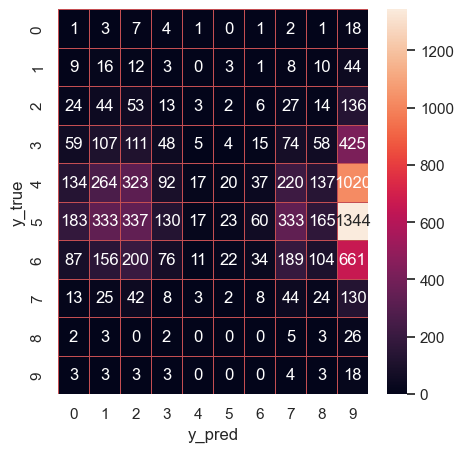

In [908]:
# no se puede crear una matriz de confuncion ya que solo maneja 0 y 1 y los valore de calificacion son 1 al 10
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest

In [909]:
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.32307147912243456


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

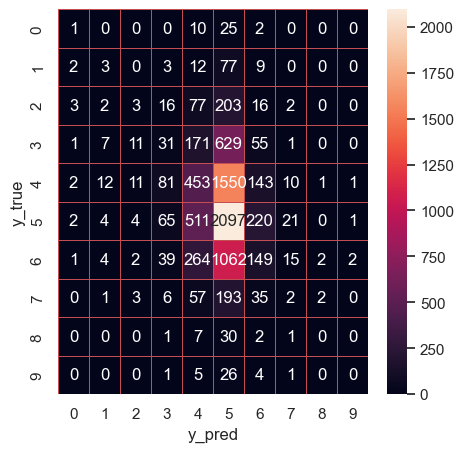

In [910]:
y_pred= rf.predict(xtest)
confusion(ytest,y_pred)

In [ ]:
SVM

In [916]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.3315640481245577